In [40]:
from sklearn.linear_model import Ridge
import numpy as np
import sklearn.datasets
from sklearn import linear_model
import sklearn.cross_validation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import ensemble
import time
import random

In [41]:
import cv2
import tqdm

In [42]:
def get_list_image(imagepath): 
    import os
    folder_path=imagepath
    image_list=[]
    for filename in os.listdir(folder_path):
        if(filename.endswith('.jpg') | filename.endswith('.jpeg') | filename.endswith('.png')):
        #it will open the filename
            #f=open(folder_path + '/' + filename)
            #print f
            image=cv2.imread(folder_path + '/' + filename)
            #image=cv2.imread(os.path.join(folder_path,filename))
            image_list.append(image)
    return image_list

'''a=[]
import os
folder_path='/Users/s0c01xa/Desktop/Frontview'
image_list=[]
for filename in os.listdir(folder_path):
    a.append(filename)'''

"a=[]\nimport os\nfolder_path='/Users/s0c01xa/Desktop/Frontview'\nimage_list=[]\nfor filename in os.listdir(folder_path):\n    a.append(filename)"

# GETTING IMAGE DATASET

In [43]:
front_view=get_list_image('/Users/s0c01xa/Desktop/Frontview')
back_view= get_list_image('/Users/s0c01xa/Desktop/Backview')
side_view= get_list_image('/Users/s0c01xa/Desktop/Sideview')


In [6]:
#plt.imshow(front_view[2])
#plt.imshow(back_view[0])
#plt.imshow(side_view[2])
#plt.show()


In [48]:
#np.shape(front_view[2])

# GETTING THE Y ENCODINGS 

In [44]:
y_front= np.array([2]*len(front_view))
y_back=np.array([1]*len(back_view))
y_side=np.array([0]*len(side_view))

# Converting the images to same size and gray scale

In [46]:
def get_processed_image(img_list):
    res_image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(200,200))
        img_gray=cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        res_image_list.append(img_gray)
    return res_image_list

In [9]:
front_view_processed=get_processed_image(front_view)
back_view_processed= get_processed_image(back_view)
side_view_processed= get_processed_image(side_view)

In [59]:
#np.shape(front_view_processed[99])

# HOG FEATURES EXTRACTION

In [62]:
#plt.imshow(front_view_processed[0])
#plt.show()

In [12]:
from skimage import feature
H = feature.hog(front_view_processed[0], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
np.shape(H)

(20736,)

In [11]:
def get_hog_feature_array(image_list):
    hog_feat_arr=np.zeros((len(image_list),20736))
    from skimage import feature
    for i in range(0,len(image_list)):
        H = feature.hog(image_list[i], orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2")
        hog_feat_arr[i]=H
        
    return hog_feat_arr
    

# HOG FEATURES


In [13]:
hog_front=get_hog_feature_array(front_view_processed)
hog_back=get_hog_feature_array(back_view_processed)
hog_side=get_hog_feature_array(side_view_processed)


In [14]:
hog_front.shape


(107, 20736)

# VISUALIZING HOG


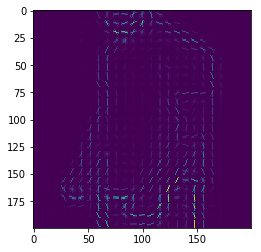

In [15]:
from skimage import exposure
from skimage import feature
import cv2
 
#H- it saves the HOG feature vector and hogImage


(H, hogImage) = feature.hog(side_view_processed[0], orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                            visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
plt.imshow(hogImage)
plt.show()

# CONCATENATING FEATURES


In [16]:
train_x= np.concatenate((hog_front, hog_back,hog_side), axis=0)
train_y=np.concatenate((y_front, y_back,y_side), axis=0)


In [14]:
np.shape(train_y)


(310,)

# SVM PREDICTOR


In [123]:
from sklearn.svm import SVC
svc=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc.fit(train_x,train_y) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [124]:
cross_val_score(svc,train_x,train_y,cv=10)

array([0.375     , 0.34375   , 0.34375   , 0.34375   , 0.34375   ,
       0.38709677, 0.35483871, 0.5       , 0.34482759, 0.37931034])

# Multinomial Logistic Regression

In [1]:
'''from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='lbfgs', max_iter=100, 
                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)
log_model.fit(train_x,train_y) '''

"from sklearn.linear_model import LogisticRegression\nlog_model=LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, \n                   class_weight=None, random_state=None, solver='lbfgs', max_iter=100, \n                   multi_class='multinomial', verbose=0, warm_start=False, n_jobs=-1)\nlog_model.fit(train_x,train_y) "

# Random Forest

In [ ]:
#Cross Validation

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size=0.33, random_state=49)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
cross_val_score(rf_model,X_train,y_train,cv=10)

array([0.54545455, 0.72727273, 0.59090909, 0.77272727, 0.9047619 ,
       0.7       , 0.8       , 0.75      , 0.36842105, 0.52631579])

In [37]:
#y_pred=rf_model.predict(train_x)
rf_model.score(X_test,y_test)

0.6504854368932039

# EXTRACTING FEATURES FROM PRE_TRAINED CNN

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras import applications

In [51]:
def get_feat_image(img_list):
    image_list=[]
    for i in range(0,len(img_list)):
        resized_image=cv2.resize(img_list[i],(224,224))
        image_list.append(resized_image)
    return image_list

In [52]:
front_view_dp=get_feat_image(front_view)
back_view_dp= get_feat_image(back_view)
side_view_dp= get_feat_image(side_view)

# MOBILENET

In [55]:
mobilenet=applications.mobilenet.MobileNet(input_shape=(224,224,3),include_top=False,pooling='max')
#mobilenet.summary()

In [97]:
from keras.preprocessing import image
def get_array_features(list_img):
    arr_img=np.zeros((len(list_img),1024))
    for i in range(0,len(list_img)):
        array=image.img_to_array(list_img[i])
        #print np.shape(array)
        arr_batch=np.expand_dims(array,axis=0)
        arr_prep=applications.mobilenet.preprocess_input(arr_batch)
        feat=mobilenet.predict(arr_prep)
        arr_img[i]=feat
        
    return arr_img

    
    

In [85]:
arr_batch=np.expand_dims(front_view_dp[0],axis=0)

In [83]:
#applications.mobilenet.preprocess_input(arr_batch)

In [98]:
feat_front=get_array_features(front_view_dp)
feat_back=get_array_features(back_view_dp)
feat_side=get_array_features(side_view_dp)

In [100]:
#feat_side.shape

In [ ]:
#GET FEATURES 

In [101]:
X= np.concatenate((feat_front, feat_back,feat_side), axis=0)
Y=np.concatenate((y_front, y_back,y_side), axis=0)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=49)

# RANDOM FOREST

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=40, criterion='entropy', 
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                 min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                 n_jobs=1)
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
rf_model.score(X_test,y_test)

0.8932038834951457

In [106]:
cross_val_score(rf_model,X_train,y_train,cv=15)

array([0.93333333, 0.86666667, 0.92857143, 1.        , 0.92857143,
       0.85714286, 1.        , 1.        , 0.92857143, 0.85714286,
       1.        , 0.92857143, 0.84615385, 0.83333333, 0.75      ])

# SVM

In [119]:
from sklearn.svm import SVC
svc=SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.0001, verbose=False)
svc.fit(X_train,y_train)



SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [120]:
svc.score(X_test,y_test)

0.9611650485436893

In [122]:
cross_val_score(svc,X_train,y_train,cv=10)

array([0.86956522, 0.95652174, 1.        , 0.95      , 0.95      ,
       1.        , 0.95      , 0.95      , 0.9       , 0.9       ])

# VGG16

In [137]:
vgg16=applications.vgg16.VGG16(input_shape=(224,224,3),include_top=False,pooling='max')
#model.summary()

In [138]:
from keras.preprocessing import image
def get_array_vgg16_features(list_img):
    arr_img=np.zeros((len(list_img),512))
    for i in range(0,len(list_img)):
        array=image.img_to_array(list_img[i])
        #print np.shape(array)
        arr_batch=np.expand_dims(array,axis=0)
        arr_prep=applications.vgg16.preprocess_input(arr_batch)
        feat=vgg16.predict(arr_prep)
        arr_img[i]=feat
        
    return arr_img



In [139]:
vgg16_feat_front=get_array_vgg16_features(front_view_dp)
vgg16_feat_back=get_array_vgg16_features(back_view_dp)
vgg16_feat_side=get_array_vgg16_features(side_view_dp)

In [141]:
vgg16_feat_back.shape

(95, 512)